# Python for spatial analysis

### Part 3 - Point pattern analysis

- Distance Based Statistical Method (G function, F function, Ripley K)
- Point simulation

I recommend an open-source python library for the statistical analysis of point patterns - [pointpats](https://pointpats.readthedocs.io/en/master/#point-pattern-analysis-pointpats). Although it's a subpackage of PySAL, you need to install it specially via 'pip install pointpats'

In [81]:
from pointpats import PointPattern, distance_statistics, PoissonPointProcess
import geopandas as gpd

# 1. Statistical analysis

In [5]:
point_data = gpd.read_file('../Data/BJ6Ring_POI_point.shp',encoding='utf-8')

In [23]:
point_data = point_data.sample(1000,random_state=1)

In [24]:
pattern = PointPattern(point_data, coord_names=['wgs84_x','wgs84_y'])
# The first parameter of PointPattern can be (n,p) array, n points with p>=2 attributes. 
# The default is that the first two columns are x and y coordinates.
# Or, you can the name of the two attributes representing spatial coordinates.

In [25]:
pattern.summary()

Point Pattern
1000 points
Bounding rectangle [(116.0976455,39.704590036), (116.69697417,40.162781676)]
Area of window: 0.27460738620632696
Intensity estimate for window: 3641.5626462743703
           wgs84_x    wgs84_y                   mark_0  \
375496  116.271069  39.921151                  Leisure   
110068  116.359717  39.971339              Residential   
249749  116.274537  39.887298       Daily Life Service   
361390  116.301160  39.977463       Daily Life Service   
260324  116.403919  39.888717  Government & Enterprise   

                            mark_1  
375496  POINT (116.27107 39.92115)  
110068  POINT (116.35972 39.97134)  
249749  POINT (116.27454 39.88730)  
361390  POINT (116.30116 39.97746)  
260324  POINT (116.40392 39.88872)  


### Mean Nearest Neighbor Distance Statistics

The mean distance ($\overline d_{min}$) between points and their nearest neighbour is assumed to be normally distributed for completely spatial random (CSR) distribution. We can test whether the target distribution is the outcome of CSR or not.

In [26]:
pattern.knn() # the default is the one nearest neighbor

(array([[ 47],
        [214],
        [437],
        [386],
        [645],
        [521],
        [186],
        [ 58],
        [766],
        [160],
        [ 65],
        [767],
        [816],
        [126],
        [303],
        [765],
        [822],
        [878],
        [ 34],
        [135],
        [281],
        [752],
        [ 50],
        [347],
        [471],
        [577],
        [930],
        [ 79],
        [569],
        [ 49],
        [607],
        [987],
        [108],
        [372],
        [ 18],
        [471],
        [691],
        [ 84],
        [786],
        [205],
        [291],
        [148],
        [438],
        [137],
        [968],
        [247],
        [802],
        [  0],
        [211],
        [269],
        [ 22],
        [433],
        [983],
        [694],
        [244],
        [ 12],
        [294],
        [261],
        [  7],
        [155],
        [246],
        [690],
        [293],
        [435],
        [828],
        [455],
        [1

Outcome: 
- tuple[0]: the id of the first nearest neighbour of each data point;
- tuple[1]: corresponding distances

In [27]:
pattern.knn(2)   # the first two nearest neighbors and corresponding distances

(array([[ 47, 314],
        [214, 100],
        [437, 223],
        ...,
        [893, 841],
        [330, 539],
        [556, 159]]),
 array([[0.00517433, 0.00719137],
        [0.00089308, 0.00097563],
        [0.00519695, 0.00638598],
        ...,
        [0.01044485, 0.01370155],
        [0.00046593, 0.00198717],
        [0.00201498, 0.00998277]]))

In [28]:
pattern.nnd   # tuple[1]

array([[5.17432665e-03],
       [8.93075635e-04],
       [5.19694775e-03],
       [3.76426750e-03],
       [5.42014776e-03],
       [8.12272342e-03],
       [5.38052587e-03],
       [2.94528008e-03],
       [1.36864452e-02],
       [3.09392427e-03],
       [6.06093761e-03],
       [5.72913410e-03],
       [1.86669553e-02],
       [1.12399003e-03],
       [7.04147576e-04],
       [4.23759925e-03],
       [3.49457852e-03],
       [4.94367126e-03],
       [7.98386810e-03],
       [2.56686924e-03],
       [1.16544099e-04],
       [9.81238278e-03],
       [3.54906073e-03],
       [4.63795157e-03],
       [4.30008962e-03],
       [1.81882822e-02],
       [3.27505776e-02],
       [9.17972398e-04],
       [3.69914509e-03],
       [1.02777879e-02],
       [1.18103380e-02],
       [3.08752185e-03],
       [1.96712399e-03],
       [5.38063291e-03],
       [7.98386810e-03],
       [2.86585580e-03],
       [2.40748363e-03],
       [5.02588863e-03],
       [1.44487710e-02],
       [1.17508046e-03],


In [29]:
pattern.min_nnd

0.0

In [30]:
pattern.max_nnd

0.04351532361039509

In [31]:
pattern.mean_nnd

0.005384654735421558

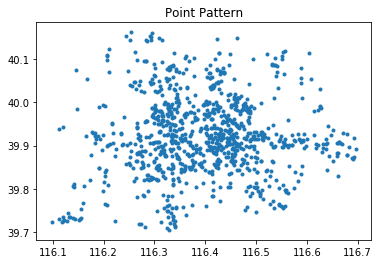

In [32]:
pattern.plot()

### Nearest Neighbor Analysis Functions

**$G$-function (event-event)** measures the proportion of nearest neighbor distances that are less than $d$. The target point $point_i$ only include those whose distance to the marginal is larger than $d$.

$$G(d)=\frac{\sum_i^N I_i(d)}{N},\ I_i(d)=
\left\{ 
             \begin{array}{cl}
             1, & if\ \overline d_{min}(point_i)<d; \\
             0, & else
             \end{array}
\right.
$$

For CSR pattern, the expectation of $G-$function is:

$$E[G(d)]=1-e^{-\lambda\pi d^2}$$

Then we can calculate the max difference of the $G-$function between the target and the CSR distributions:

$$
D_d = max|E[G(d)]-G(d)|
$$

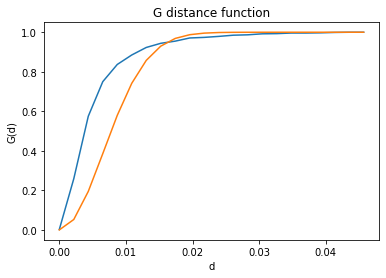

In [47]:
gf = distance_statistics.G(pattern, intervals=20)
gf.plot()

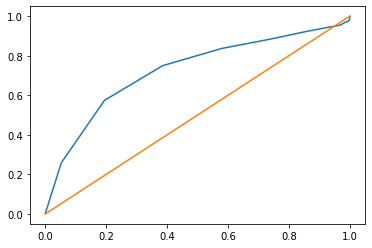

In [48]:
gf.plot(qq=True)   #quantile-quantile plot

In [49]:
# x values in the plot
gf.d

array([0.        , 0.00217577, 0.00435153, 0.0065273 , 0.00870306,
       0.01087883, 0.0130546 , 0.01523036, 0.01740613, 0.0195819 ,
       0.02175766, 0.02393343, 0.02610919, 0.02828496, 0.03046073,
       0.03263649, 0.03481226, 0.03698803, 0.03916379, 0.04133956,
       0.04351532, 0.04569109])

In [50]:
# y values in the plot
gf.G

array([0.002, 0.259, 0.575, 0.75 , 0.837, 0.885, 0.923, 0.944, 0.955,
       0.971, 0.974, 0.979, 0.985, 0.987, 0.992, 0.993, 0.996, 0.996,
       0.997, 0.999, 1.   , 1.   ])

It is obvious that the $G$ grows quicker than the CSR when $d$ is small, and then slowly increases at large $d$. It then comes a reasonable assumption that the points are clustered compared to CSR. Then we need to simulate CSR many times (such as >1000) to come to a final conclusion based on significant tests. We can use **Simulation Envelopes** to achieve such simulations and significance test.

In [64]:
realizations = PoissonPointProcess(pattern.window, pattern.n, 100, asPP=True) # simulate CSR 100 times
genv = distance_statistics.Genv(pattern, intervals=20, realizations=realizations) # call Genv to generate simulation envelope
genv

In [65]:
genv.observed

array([[0.        , 0.002     ],
       [0.00217577, 0.259     ],
       [0.00435153, 0.575     ],
       [0.0065273 , 0.75      ],
       [0.00870306, 0.837     ],
       [0.01087883, 0.885     ],
       [0.0130546 , 0.923     ],
       [0.01523036, 0.944     ],
       [0.01740613, 0.955     ],
       [0.0195819 , 0.971     ],
       [0.02175766, 0.974     ],
       [0.02393343, 0.979     ],
       [0.02610919, 0.985     ],
       [0.02828496, 0.987     ],
       [0.03046073, 0.992     ],
       [0.03263649, 0.993     ],
       [0.03481226, 0.996     ],
       [0.03698803, 0.996     ],
       [0.03916379, 0.997     ],
       [0.04133956, 0.999     ],
       [0.04351532, 1.        ],
       [0.04569109, 1.        ]])

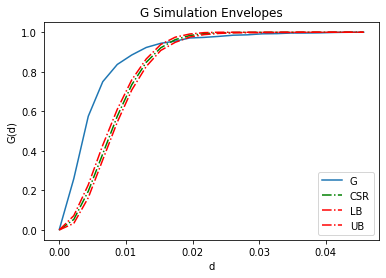

In [66]:
genv.plot()

The $G$ curve is obviously outside and upon the CSR significant curves, so we can conclude that the points are outcomes of cluster point process.

**$F$-function (point-event)** is similar to the $G-$function, but the distance is not to the points in target events, but to the points coming from CSR process.

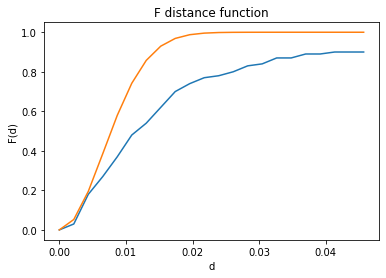

In [52]:
ff = distance_statistics.F(pattern, intervals=20)
ff.plot()

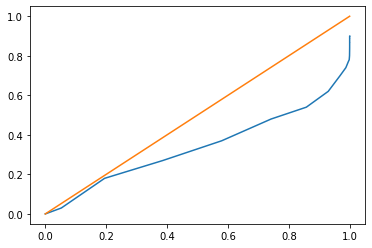

In [53]:
ff.plot(qq=True)

In [67]:
fenv = distance_statistics.Fenv(pattern, intervals=20, realizations=realizations) # call Genv to generate simulation envelope
fenv

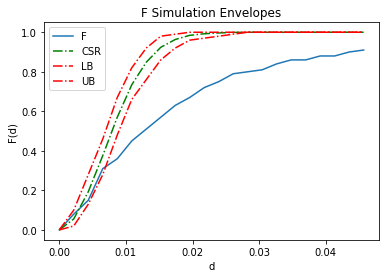

In [68]:
fenv.plot()

**$J-$function** is based on these two functions. One of its advantage is that it is based on the non-CSR null hypothesis. When $J<1$, the points are clustered; if $J=1$, the underlying process is a random point process; when $J>1$, it is a regular process.

$$
J(d) = \frac{1-G(d)}{1-F(d)}
$$

/home/xxy/Environment/anaconda3/envs/py36/lib/python3.6/site-packages/pointpats/_deprecated_distance_statistics.py:239: RuntimeWarning: invalid value encountered in true_divide
  self.ev = self.j / self.j


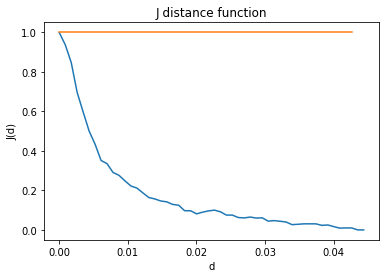

In [78]:
jf = distance_statistics.J(pattern, intervals=50)
jf.plot()  
# The warning may due to F(d) becoming 1 in CSR process, but I do not find out how to fix it until now. This also influence the belowed Jenv calculations. 
# If you know, please contact me.

In [79]:
# jenv = distance_statistics.Jenv(pattern, intervals=50, realizations=realizations)
# jenv.plot()

IndexError: index 52 is out of bounds for axis 0 with size 52

The $J(d)$ is obviously under $J(d)=1$, so we can conclude that the underlining process has a large propability to be a cluster process.

There also has **$S-$function** as $S(d)=\sum_{i=1}^N[F(d_i)-G(d_i)]$ or $S(d)=\sum_{i=1}^N|F(d_i)-G(d_i)|$, which is quite similar to $J-$function to compare the $F(d)$ and $G(d)$. The latter is better under most circumstances because the positive and negative values can not be added to be zero. It seems that the $S-$function is not included in the package.

### Second-order point pattern analysis 

The $F-$function, $G-$function, and their combinations only consider the nearest distances which rely on a single spatial scale. We can call them `the first-order measurement'. Acturally, we can use all the points including higher order neighbors to consider distances between all target points. 

$K-$function is related to the expect number of points within a specific circle.

$$
K(d)=A\sum_{i=1,i\neq j}^N\sum_{j=1}^Nh_i(d)I_d(i,j)/N^2
$$
$A$ is the area of target zones; $h_i(d)=1$ if the circle with point $i$ as centre and $d$ as its radius located completely within the study area, otherwise $h_i(d)$ equals to the reciprocal intersected areas; $I_d(i,j)$ is 1 when $d_{ij}\leq d$, else 0; $N$ is the total number of points.

If the target points are generated from a CSR process, the expect point number will follow Poisson distribution. The expect number of points within a circle with $d$ as its radius is $n\pit^2/A$.

We can also compare target process with CSR via $L-$function:

$$
L(d)=\sqrt{K(d)/\pi}-d
$$

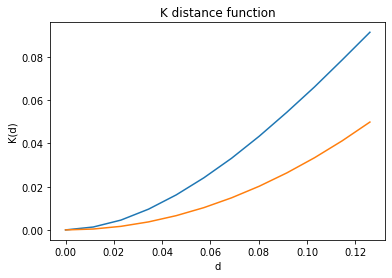

In [59]:
kf = distance_statistics.K(pattern)
kf.plot()

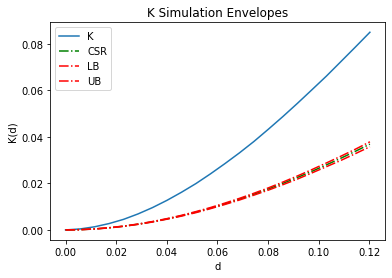

In [74]:
kenv = distance_statistics.Kenv(pattern, intervals=20, realizations=realizations)
kenv.plot()

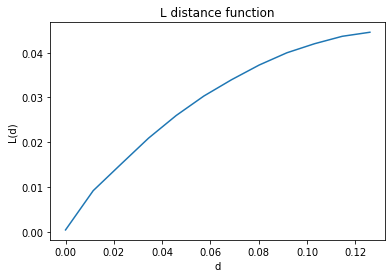

In [60]:
lf = distance_statistics.L(pattern)
lf.plot()

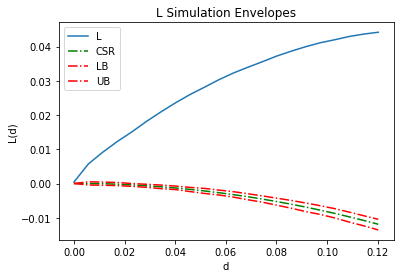

In [75]:
lenv = distance_statistics.Lenv(pattern, intervals=20, realizations=realizations)
lenv.plot()

# 2. Simulating point process

- Random pattern ($N$-conditioned, $\lambda$-conditioned)
- Cluster pattern
- Regular pattern

All refer to https://nbviewer.jupyter.org/github/pysal/pointpats/blob/master/notebooks/process.ipynb.

In [89]:
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern
import libpysal as ps
from libpysal.cg import shapely_ext
import numpy as np

In [87]:
# open the virginia polygon shapefile
va = ps.io.open('../Data/Beijing6Ring_Polygon.shp')
polys = [shp for shp in va]
# Create the exterior polygons for VA from the union of the county shapes
state = shapely_ext.cascaded_union(polys)
# create window from virginia state boundary
window = Window(state.parts)

SHAPEFILE WARNING: Polygon 3 topology has been fixed. (ccw -> cw)


/home/xxy/Environment/anaconda3/envs/py36/lib/python3.6/site-packages/libpysal/io/iohandlers/pyShpIO.py:174: RuntimeWarning: SHAPEFILE WARNING: Polygon 3 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


### Random pattern 

$N$-conditioned

In [90]:
np.random.seed(5)
samples = PoissonPointProcess(window, 200, 1, conditioning=False, asPP=False)  
# by specifying "asPP" false, we can generate a point series
# by specifying "asPP" true, or we will directly get a point pattern, samples.realizations[0] will be like <pointpats.pointpattern.PointPattern at 0x7fb5f41af208> instead of an array series. 

In [91]:
samples.realizations[0] # simulated event points

array([[116.22423069,  39.8584922 ],
       [116.2147703 ,  39.77007168],
       [116.38924415,  39.82470785],
       [116.46563369,  39.85878493],
       [116.56111948,  39.97673101],
       [116.4078297 ,  40.06597873],
       [116.2705647 ,  39.99301402],
       [116.2030034 ,  39.7671771 ],
       [116.54410667,  40.04440774],
       [116.36007022,  39.93135016],
       [116.18478665,  40.00218483],
       [116.63174664,  39.93703505],
       [116.25649612,  39.77131787],
       [116.34330106,  40.00112844],
       [116.2701184 ,  40.16948534],
       [116.4761904 ,  40.06370432],
       [116.44587178,  39.77776319],
       [116.45831595,  39.74779612],
       [116.25137551,  40.14140542],
       [116.26306117,  40.13157485],
       [116.24379996,  40.05343658],
       [116.2896189 ,  40.05894655],
       [116.1760252 ,  39.75901663],
       [116.18930996,  40.08391223],
       [116.20343289,  39.8873121 ],
       [116.21343021,  40.10021538],
       [116.52020074,  39.76788195],
 

In [92]:
# build a point pattern from the simulated point series
pp_csr = PointPattern(samples.realizations[0])

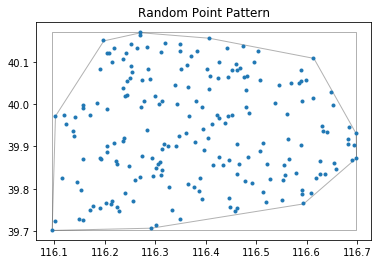

In [102]:
pp_csr.plot(window=True, hull=True, title='Random Point Pattern')  # hull, window - whether draw the maximum bounding polygon and rectangle

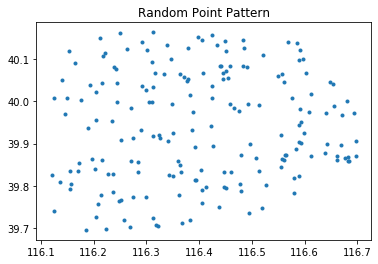

In [114]:
pp_csr.plot(window=False, hull=False, title='Random Point Pattern')

$\lambda$-conditioned (The function will calculate the intensity $\lambda$ according to your input N(=200, in our example), we will obtain points with similar intensities, but not strictly with similar point numbers.)

In [110]:
# by specifying "conditioning" True, we can simulate a lamda-conditioned CSR
np.random.seed(5)
samples = PoissonPointProcess(window, 200, 1, conditioning=True, asPP=True)
samples

In [113]:
pp_csr = samples.realizations[0] # simulated point pattern
pp_csr

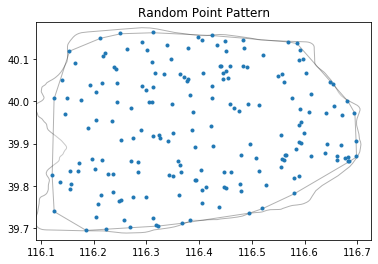

In [115]:
pp_csr.plot(window=True, hull=True, title='Random Point Pattern')

In [116]:
pp_csr.n

188

In [121]:
samples = PoissonPointProcess(window, 100, 1, conditioning=True, asPP=True)
samples

In [122]:
pp_csr = samples.realizations[0] # simulated point pattern
pp_csr

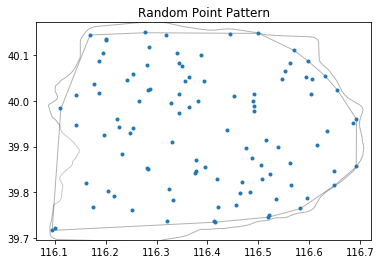

In [123]:
pp_csr.plot(window=True, hull=True, title='Random Point Pattern')

In [124]:
pp_csr.n

101

### Cluster pattern

There are two sources of clustering:

-Contagion: presence of events at one location affects probability of events at another location (**correlated point process**)
-Heterogeneity: intensity $\lambda$ varies with location (**heterogeneous Poisson point process**)

The PoissonClusterPointProcess seems mainly focus on the first one.

First generate parent points using CSR generation, based on both $N-$conditioned and $\lambda-$conditioned by set `conditioning' parameter True or False. Then we generate offspring events independently around the parents within a circle of radius $r$ centered on the parent. 

In [173]:
csamples = PoissonClusterPointProcess(window, 200, 5, 0.05, 1, asPP=True, conditioning=False)
# parameter: total number-200, parents-5, offsprings-200/5, radius-0.05, realization nums-1
csamples

In [174]:
csamples.num_parents 

{0: 5}

In [175]:
csamples.children

40

In [176]:
pp_pcp = csamples.realizations[0]
pp_pcp

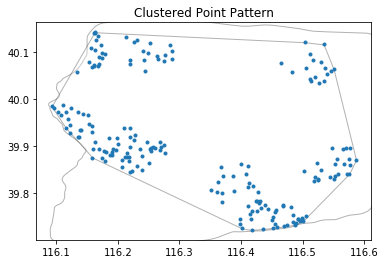

In [177]:
pp_pcp.plot(window=True, hull=True, title='Clustered Point Pattern') #plot the first realization